# 第5章 多変数の確率分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

chapter-03.ipynb で保存しておいたデータを再利用します．

In [2]:
Ydata = np.load('Ch03_Ydata5000.npy')
Zdata = np.load('Ch03_Zdata5000.npy')

Ω = np.array(range(5001))

def _Y(ω):
    return Ydata[ω]

def _Z(ω):
    return Zdata[ω]

Y = np.vectorize(_Y)
Z = np.vectorize(_Z)

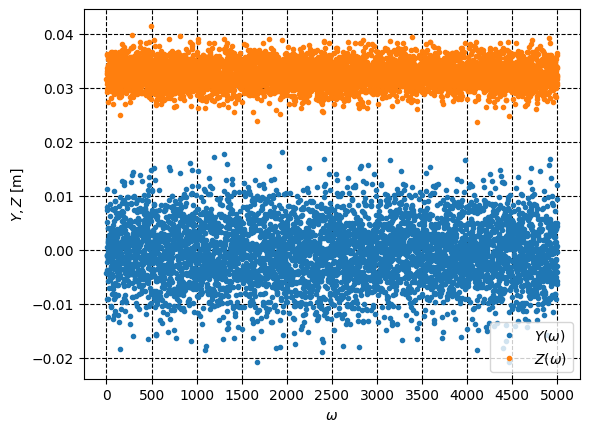

In [3]:
plt.plot(Ω,Y(Ω),'.',label='$Y(\omega)$')
plt.plot(Ω,Z(Ω),'.',label='$Z(\omega)$')
plt.legend()
plt.xlabel('$\omega$')
plt.ylabel('$Y,Z$ [m]')
plt.xticks(np.arange(0,5001,500))
plt.grid(which='major',color='black',linestyle='--')
plt.grid(which='minor',color='black',linestyle='--')

## 5.2 2次元の確率ベクトル

### 3章の $Y(\omega),Z(\omega)$ を成分とする確率ベクトルの例

In [4]:
def XX(ω):
    return np.array([Y(ω),Z(ω)])

In [5]:
XX(1)

array([-0.00094219,  0.03256218])

In [6]:
XX([1,2,3])[1]

array([0.03256218, 0.03270947, 0.02923083])

$XX(\omega), \;\omega=0,\cdots,5000$ の散布図

In [7]:
def scatterplot(RandomVector, label='', color='C0'):
    plt.plot(RandomVector[0], RandomVector[1], '.', color=color, label=label)
    if label:
        plt.legend()
    plt.xlabel('$X_1(\omega)$')
    plt.ylabel('$X_2(\omega)$')
    plt.grid(which='major',color='black',linestyle='--')
    plt.grid(which='minor',color='black',linestyle='--')

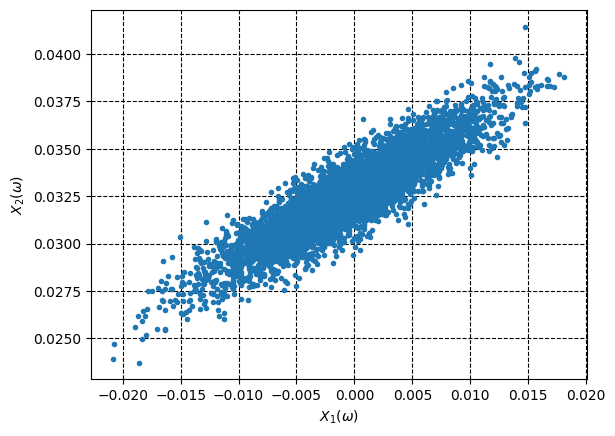

In [8]:
scatterplot(XX(Ω))

## 5.2.1 事象

In [9]:
def get_event(allvalues, x1range=[-np.inf, np.inf], x2range=[-np.inf, np.inf]): 
    #確率ベクトル，第1成分の区間，第2成分の区間
    event1 = np.where((x1range[0]<=allvalues[0]) & (allvalues[0]<x1range[1]))[0]
    event2 = np.where((x2range[0]<=allvalues[1]) & (allvalues[1]<x2range[1]))[0]
    return np.intersect1d(event1, event2) #積事象＝値が矩形領域に収まる事象

例：全領域に収まる事象

In [10]:
np.allclose(get_event(XX(Ω)),Ω) #get_event(XX)=Ωの判定

True

例：矩形領域 [0.005,0.01]$\times$[0.035,0.0375] に収まる事象

In [11]:
A = get_event(XX(Ω),[0.005,0.01],[0.035,0.0375]) #矩形領域に収まる事象
Ac = np.setdiff1d(Ω,A) #余事象

In [12]:
A

array([   4,   42,   57,   90,   95,   98,  128,  138,  142,  152,  167,
        169,  173,  174,  179,  182,  185,  188,  199,  207,  213,  224,
        227,  233,  239,  261,  268,  277,  302,  306,  327,  333,  337,
        341,  354,  374,  394,  419,  425,  428,  429,  438,  442,  461,
        477,  480,  485,  487,  509,  524,  545,  551,  564,  580,  609,
        610,  639,  644,  649,  651,  655,  678,  690,  711,  724,  731,
        734,  736,  760,  762,  765,  767,  770,  783,  788,  791,  811,
        812,  815,  816,  827,  834,  841,  844,  848,  862,  870,  871,
        880,  890,  900,  921,  949,  957, 1000, 1047, 1054, 1067, 1069,
       1099, 1104, 1112, 1143, 1147, 1149, 1155, 1164, 1187, 1205, 1222,
       1247, 1249, 1259, 1263, 1267, 1309, 1338, 1344, 1347, 1348, 1353,
       1366, 1373, 1387, 1388, 1391, 1421, 1456, 1468, 1484, 1557, 1575,
       1594, 1598, 1608, 1609, 1615, 1624, 1626, 1631, 1633, 1634, 1637,
       1645, 1655, 1668, 1671, 1681, 1682, 1685, 16

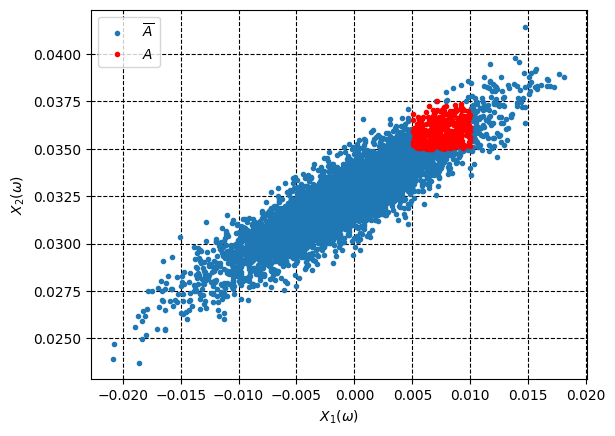

In [13]:
scatterplot(XX(Ac),label='$\overline{A}$')
scatterplot(XX(A),label='$A$',color='red')

## 5.2.2 結合確率

ラプラスの方法を採用し，見本$\omega=0,1,\cdots,5000$は等確率で起きると仮定する．
このとき，事象Aの確率は$P(A):=\# A/\# \Omega$となる．

In [14]:
def P(A):
    return len(A)/len(Ω)

In [15]:
P(A)

0.07558488302339532

事象A,Bの結合確率は次のように書ける．

In [16]:
np.intersect1d([1,2,3,5],[3,4,5,6])

array([3, 5])

In [17]:
def P2d(A,B):
    product = np.intersect1d(A,B) #積事象
    return P(product)

In [18]:
B = get_event(XX(Ω), [0,0.01], [0.035,0.036]) #別の事象
P2d(A,B)

0.04539092181563687

## 5.2.3 分布関数

### 確率ベクトルの成分の値が区間に収まる確率

In [19]:
def P2d_valued(r1, r2):
    event = get_event(XX(Ω), r1, r2)
    return P(event)

In [20]:
P2d_valued([0,1e-2],[0.035,0.036])

0.06778644271145771

### 分布関数の定義

In [21]:
def _F(x,y):
    return P2d_valued([-np.inf, x],[-np.inf, y])

F = np.vectorize(_F)

動作確認

In [22]:
_F(0,0.03)

0.1295740851829634

In [23]:
F([0,0],[0.03,0.035])

array([0.12957409, 0.53229354])

プロット

In [24]:
from matplotlib import cm

def density_plot(Xgrid, Ygrid, Zgrid, zlabel='zlabel', cmap=cm.coolwarm):
    fig = plt.figure(figsize=(10,4))
    ax2d = fig.add_subplot(121)
    ax3d = fig.add_subplot(122, projection='3d')
    cont = ax2d.contourf(Xgrid, Ygrid, Zgrid, cmap=cmap)
    ax2d.set_xlabel('$x$')
    ax2d.set_ylabel('$y$')
    surf = ax3d.plot_surface(Xgrid, Ygrid, Zgrid, cmap=cmap, linewidth=0)
    ax3d.set_xlabel('$x$')
    ax3d.set_ylabel('$y$')
    ax3d.set_zlabel(zlabel)
    fig.colorbar(cont, ax=ax2d, label=zlabel)
    plt.tight_layout(pad=1)

In [25]:
xx = np.linspace(-0.025, 0.02, 30)
yy = np.linspace(0.02, 0.05, 30)
Xgrid, Ygrid = np.meshgrid(xx, yy)
Zgrid = F(Xgrid,Ygrid)

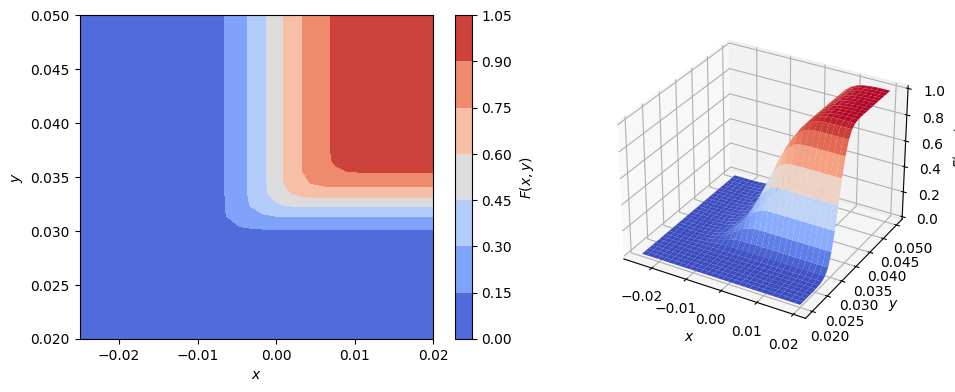

In [26]:
density_plot(Xgrid,Ygrid,Zgrid,zlabel='$F(x,y)$')

## 5.2.4 密度関数

この Notebook の分布関数は数式表現されていないので，4.1.3節と同様に，ヒストグラムから構成してみる．

In [27]:
def _Pij(i,j):
    return P2d_valued([xx[i],xx[i+1]], [yy[j],yy[j+1]])

Pij = np.vectorize(_Pij)

Pij(10,10)

array(0.01019796)

### ヒストグラム

In [28]:
ii = jj = list(range(29))
II,JJ = np.meshgrid(ii,jj)
histo = Pij(II,JJ)
Xgrid2,Ygrid2 = np.meshgrid(xx[ii],yy[jj])

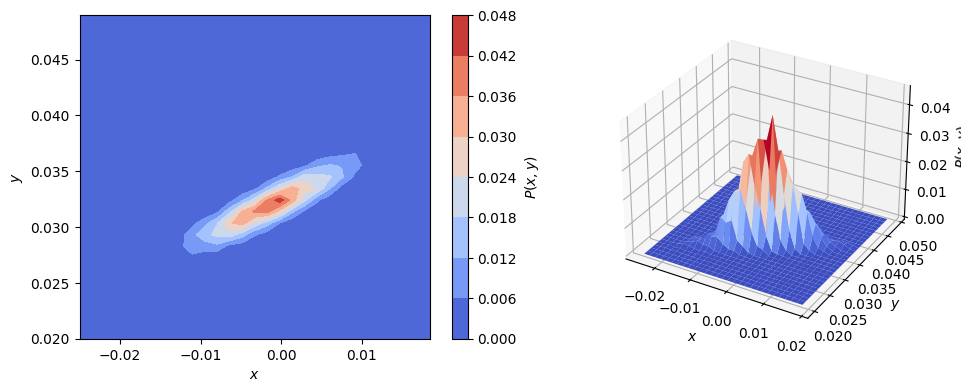

In [29]:
density_plot(Xgrid2,Ygrid2,histo,zlabel='$P(x,y)$')

### 密度関数

In [30]:
Δx=xx[1]-xx[0]
Δy=yy[1]-yy[0]
density = histo /(Δx*Δy)

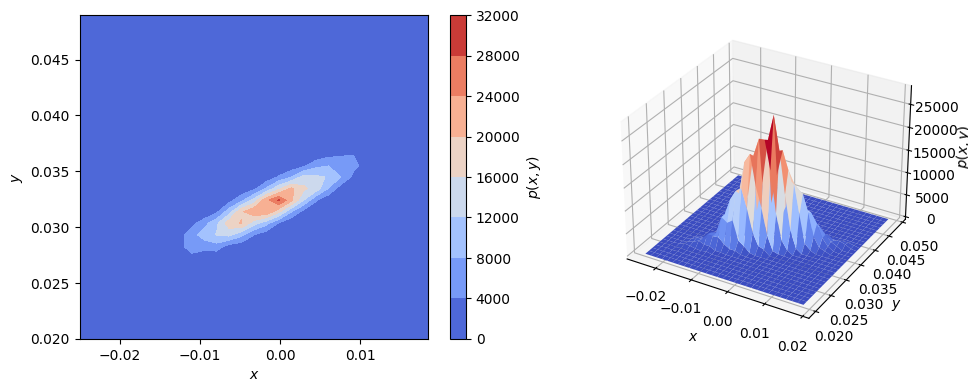

In [31]:
density_plot(Xgrid2,Ygrid2,density,zlabel='$p(x,y)$')

## 5.2.5 2次元のガウス分布

In [32]:
def _gauss2d(x1,x2,m1,m2,s1,s2,ρ):
    a = 1.0/(2*np.pi*s1*s2*np.sqrt(1-ρ**2))
    b = -0.5/(1-ρ**2)*( (x1-m1)**2/(s1**2) - 2*ρ*(x1-m1)*(x2-m2)/(s1*s2) + (x2-m2)**2/(s2**2))
    return  a * np.exp(b)
    
gauss2d = np.vectorize(_gauss2d,excluded=['m1','m2','s1','s2','ρ'])

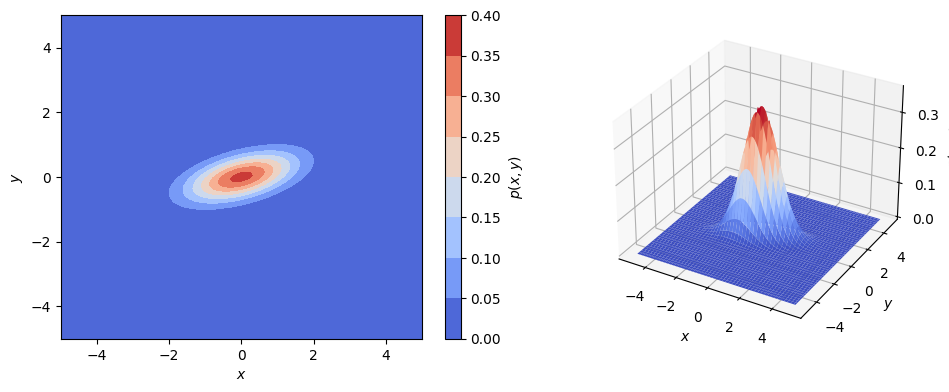

In [33]:
X1,X2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
ZZ = gauss2d(X1,X2,0,0,1,0.5,0.5)

density_plot(X1,X2,ZZ,zlabel='$p(x,y)$')

## 5.3 独立性

## 5.3.1 事象の独立性

単位正方形$[0,1]\times[0,1]$に一様分布する点について，数値例を示す．

In [34]:
from numpy.random import *

In [35]:
Ω = np.array(range(500))
seed(1)
RandomSquare = rand(2,500)

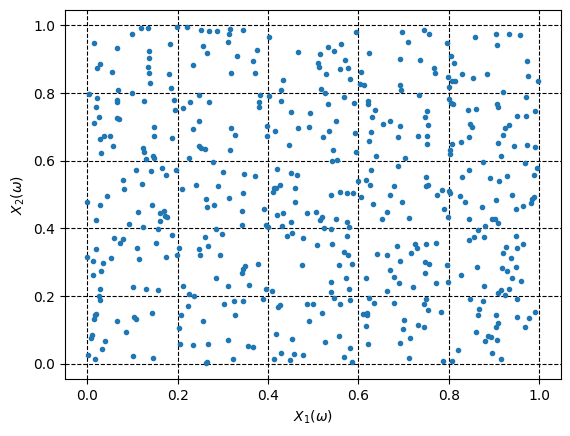

In [36]:
scatterplot(RandomSquare)

In [37]:
eventA = get_event(RandomSquare, x1range=[0.6,1])
eventB = get_event(RandomSquare, x2range=[0.2,0.4])
eventC = get_event(RandomSquare, x1range=[0,0.8], x2range=[0.2,0.4])

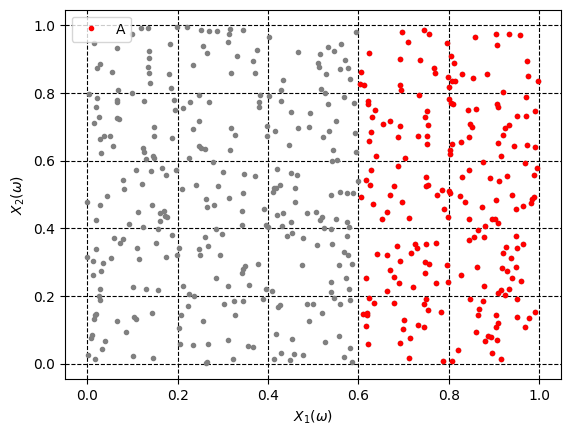

In [38]:
scatterplot(RandomSquare,color='gray')
scatterplot(RandomSquare[:,eventA],color='red',label='A')

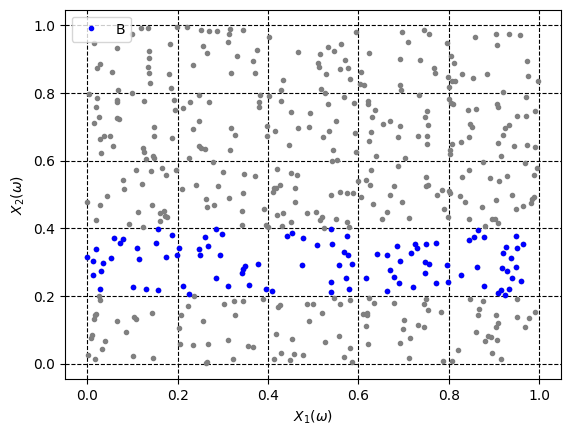

In [39]:
scatterplot(RandomSquare,color='gray')
scatterplot(RandomSquare[:,eventB],color='blue',label='B')

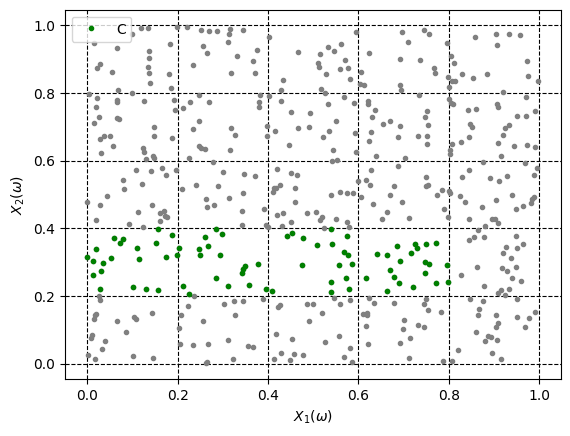

In [40]:
scatterplot(RandomSquare,color='gray')
scatterplot(RandomSquare[:,eventC],color='green',label='C')

#### 独立な例

<font color="red">標本数が有限なので，ぴったり「P(A,B) = P(A)P(B)」にはなりません！</font>

In [41]:
P2d(eventA,eventB)

0.086

In [42]:
P(eventA)*P(eventB)

0.081972

#### 独立でない例

In [43]:
P2d(eventA,eventC)

0.042

In [44]:
P(eventA)*P(eventC)

0.063756

### 標本数を増やした場合

In [45]:
Ω = np.array(range(500000))
seed(1)
RandomSquare = rand(2,500000)

In [46]:
eventA = get_event(RandomSquare, x1range=[0.6,1])
eventB = get_event(RandomSquare, x2range=[0.2,0.4])
eventC = get_event(RandomSquare, x1range=[0,0.8], x2range=[0.2,0.4])

#### 独立な例

<font color="red">「P(A,B) = P(A)P(B)」の精度は，標本数を増やすと向上します．</font>

In [47]:
P2d(eventA,eventB)

0.080546

In [48]:
P(eventA)*P(eventB)

0.080234063928

#### 独立でない例

In [49]:
P2d(eventA,eventC)

0.040362

In [50]:
P(eventA)*P(eventC)

0.06415556148

## 5.3.2 条件付き確率

In [51]:
def Pcond(A,B):
    return P2d(A,B)/P(B)

#### 独立な例

<font color="red">標本数が有限なので，ぴったり「P(A|B) = P(A)」にはなりません．</font>

In [52]:
Pcond(eventA,eventB)

0.40167760467574953

In [53]:
P(eventA)

0.400122

#### 独立でない例

In [54]:
Pcond(eventA,eventC)

0.2517275788948484

In [55]:
P(eventA)

0.400122

## 5.3.3 確率変数の独立性

省略

## 5.3.4 条件付き密度関数

### プロット用の関数

In [56]:
def density_plot2(Xgrid, Ygrid, Zgrid, zmax=0.31, zstep=0.1, cmap="binary", labels=['$x_1$','$x_2$','$p(x_1,x_2)$']):
    fig = plt.figure(figsize=(4,3))
    ax3d = fig.add_subplot(111, projection='3d')
    ax3d.view_init(elev=17, azim=-115)
    surf = ax3d.plot_surface(Xgrid, Ygrid, Zgrid, cmap=cmap, linewidth=0)
    zoff = -0.7*zmax
    ax3d.set_zticks(np.arange(0,zmax,zstep))
    ax3d.set_zlim([zoff,zmax])
    ax3d.contourf(Xgrid, Ygrid, Zgrid, cmap=cmap, offset=zoff)
    ax3d.set_xlabel(labels[0],fontsize=12)
    ax3d.set_ylabel(labels[1],fontsize=12)
    ax3d.zaxis.set_rotate_label(False)
    ax3d.set_zlabel(labels[2],fontsize=12,rotation=90)
    plt.tight_layout(pad=1)

### 結合確率密度

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


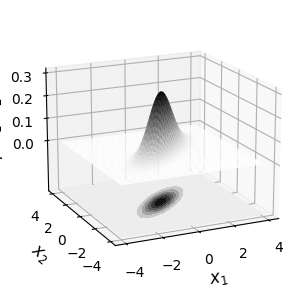

In [58]:
%matplotlib inline
X1,X2 = np.meshgrid(np.linspace(-4,4,100),np.linspace(-4,4,100))
ZZ_joint = gauss2d(X1,X2,0,0,1,1,0.8)

density_plot2(X1,X2,ZZ_joint)
# plt.savefig('figs/Ch05_gauss_2d.eps', bbox_inches='tight', zmax=0.2)
plt.savefig('figs/Ch05_gauss_2d.eps', bbox_inches='tight')

### 条件付き密度関数の定義式 $p(x_1 | x_2):=p(x_1,x_2)/p(x_2)$ 

In [59]:
def _gauss1d(x,m,v):
    a = 1/np.sqrt(2*np.pi*v)
    b = -(x-m)**2/(2*v)
    return  a * np.exp(b)

def _gauss2d_cond_def(x1,x2,m1,m2,s1,s2,ρ):
    return _gauss2d(x1,x2,m1,m2,s1,s2,ρ)/_gauss1d(x2,m2,s2**2)
    
gauss2d_cond_def = np.vectorize(_gauss2d_cond_def,excluded=['m1','m2','s1','s2','ρ'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


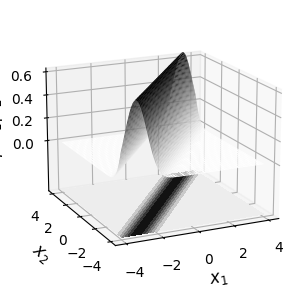

In [60]:
ZZ_cond_def = gauss2d_cond_def(X1,X2,0,0,1,1,0.8)

density_plot2(X1,X2,ZZ_cond_def,zmax=0.61,zstep=0.2,labels=['$x_1$','$x_2$','$p(x_1|x_2)$'])
plt.savefig('figs/Ch05_gauss_cond_def.eps', bbox_inches='tight')

### ガウス分布について整理した理論式

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


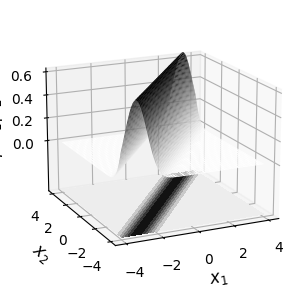

In [61]:
def _gauss2d_cond_reduce(x1,x2,m1,m2,s1,s2,ρ):
    return _gauss1d(x1, m1+ρ*s1/s2*(x2-m2), s1**2*(1-ρ**2))

gauss2d_cond_reduce = np.vectorize(_gauss2d_cond_reduce,excluded=['m1','m2','s1','s2','ρ'])

ZZ_cond_reduce = gauss2d_cond_reduce(X1,X2,0,0,1,1,0.8)

density_plot2(X1,X2,ZZ_cond_reduce,zmax=0.61,zstep=0.2,labels=['$x_1$','$x_2$','$p(x_1|x_2)$'])
plt.savefig('figs/Ch05_gauss_cond_reduce.eps', bbox_inches='tight')

誤差のチェック

In [62]:
np.linalg.norm(ZZ_cond_def - ZZ_cond_reduce)

2.6721792976767763e-14

計算機誤差の範囲で0になってるのでOK